In [1]:
!ls


ott.csv  sample_data


In [2]:
import pandas as pd

df = pd.read_csv("ott.csv")   # use EXACT name you saw
df.head()


,src_ip_numeric,Amazon_time_occupation,AmazonVideo_time_occupation,Apple_time_occupation,AppleiCloud_time_occupation,AppleiTunes_time_occupation,AppleStore_time_occupation,DataSaver_time_occupation,Deezer_time_occupation,Dropbox_time_occupation,...,WeChat_data_occupation,WhatsApp_data_occupation,WhatsAppCall_data_occupation,WhatsAppFiles_data_occupation,Wikipedia_data_occupation,Xbox_data_occupation,Yahoo_data_occupation,YouTube_data_occupation,Zoom_data_occupation,cluster
0,3232268456,5866.924013,1109.806262,790.283133,1096.484123,53.919554,6.689058,0.00000,0.0,4297.413253,...,0.0,33965.16155,0.0,0,18054.37074,0.000000,3672.434805,1.233127e+04,0.0,2
1,3232266563,2394.652810,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,0.0,0.00000,0.0,0,76045.66667,0.000000,0.000000,6.051429e+03,0.0,0
2,3232267701,17762.991410,24.398329,0.000000,0.000000,0.000000,0.000000,610.12034,0.0,4284.480731,...,0.0,10520.03936,0.0,0,0.00000,9.058147,3377.515224,3.297037e+06,0.0,2
3,3232266626,4765.766732,54.645073,0.000000,0.000000,28.104460,0.000000,0.00000,0.0,0.000000,...,0.0,0.00000,0.0,0,12386.41314,6976.721663,3560.322413,7.396501e+05,0.0,1
4,3232267262,2190.290850,424.140728,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,2533.486440,...,0.0,0.00000,0.0,0,31270.82244,5226.108275,5942.540579,1.392668e+06,0.0,1


In [3]:
df.shape


(1249, 114)

In [4]:
df.columns


Index(['src_ip_numeric', 'Amazon_time_occupation',
       'AmazonVideo_time_occupation', 'Apple_time_occupation',
       'AppleiCloud_time_occupation', 'AppleiTunes_time_occupation',
       'AppleStore_time_occupation', 'DataSaver_time_occupation',
       'Deezer_time_occupation', 'Dropbox_time_occupation',
       ...
       'WeChat_data_occupation', 'WhatsApp_data_occupation',
       'WhatsAppCall_data_occupation', 'WhatsAppFiles_data_occupation',
       'Wikipedia_data_occupation', 'Xbox_data_occupation',
       'Yahoo_data_occupation', 'YouTube_data_occupation',
       'Zoom_data_occupation', 'cluster'],
      dtype='object', length=114)

In [5]:
df.dtypes


,0
src_ip_numeric,int64
Amazon_time_occupation,float64
AmazonVideo_time_occupation,float64
Apple_time_occupation,float64
AppleiCloud_time_occupation,float64
...,...
Xbox_data_occupation,float64
Yahoo_data_occupation,float64
YouTube_data_occupation,float64
Zoom_data_occupation,float64


In [6]:
df.isna().sum().head(10)


,0
src_ip_numeric,0
Amazon_time_occupation,0
AmazonVideo_time_occupation,0
Apple_time_occupation,0
AppleiCloud_time_occupation,0
AppleiTunes_time_occupation,0
AppleStore_time_occupation,0
DataSaver_time_occupation,0
Deezer_time_occupation,0
Dropbox_time_occupation,0


In [8]:
df_clean = df.copy()


In [9]:
df_clean.columns[:10]


Index(['src_ip_numeric', 'Amazon_time_occupation',
       'AmazonVideo_time_occupation', 'Apple_time_occupation',
       'AppleiCloud_time_occupation', 'AppleiTunes_time_occupation',
       'AppleStore_time_occupation', 'DataSaver_time_occupation',
       'Deezer_time_occupation', 'Dropbox_time_occupation'],
      dtype='object')

In [12]:
df_clean.duplicated().sum()


np.int64(29)

In [13]:
df_clean = df_clean.drop_duplicates()


In [14]:
df_clean.duplicated().sum()


np.int64(0)

In [15]:
usage_cols = [col for col in df_clean.columns if "occupation" in col.lower()]
len(usage_cols)


112

In [17]:
df_long = df_clean.melt(
    value_vars=usage_cols,
    var_name="Platform",
    value_name="Usage"
)


In [19]:
df_long.head()


,Platform,Usage
0,Amazon_time_occupation,5866.924013
1,Amazon_time_occupation,2394.652810
2,Amazon_time_occupation,17762.991410
3,Amazon_time_occupation,4765.766732
4,Amazon_time_occupation,2190.290850


from matplotlib import pyplot as plt
_df_9['Usage'].plot(kind='hist', bins=20, title='Usage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Usage'].plot(kind='line', figsize=(8, 4), title='Usage')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
usage_cols = [col for col in df_clean.columns if "occupation" in col.lower()]

df_long = df_clean.melt(
    value_vars=usage_cols,
    var_name="Platform",
    value_name="Usage"
)


In [21]:
df_long.head()


,Platform,Usage
0,Amazon_time_occupation,5866.924013
1,Amazon_time_occupation,2394.652810
2,Amazon_time_occupation,17762.991410
3,Amazon_time_occupation,4765.766732
4,Amazon_time_occupation,2190.290850


In [22]:
top_platforms = (
    df_long.groupby("Platform")["Usage"]
    .mean()
    .sort_values(ascending=False)
)

top_platforms.head(10)


,Usage
Platform,
YouTube_data_occupation,567524.225710
GoogleDocs_data_occupation,534497.839730
HTTP_data_occupation,323807.596798
GMail_data_occupation,205563.649244
GoogleDrive_data_occupation,152367.875666
Amazon_data_occupation,129425.188179
AmazonVideo_data_occupation,119352.016771
Google_data_occupation,104105.083574
Google_time_occupation,103755.078416


In [23]:
top10 = top_platforms.head(10)
top10


,Usage
Platform,
YouTube_data_occupation,567524.225710
GoogleDocs_data_occupation,534497.839730
HTTP_data_occupation,323807.596798
GMail_data_occupation,205563.649244
GoogleDrive_data_occupation,152367.875666
Amazon_data_occupation,129425.188179
AmazonVideo_data_occupation,119352.016771
Google_data_occupation,104105.083574
Google_time_occupation,103755.078416


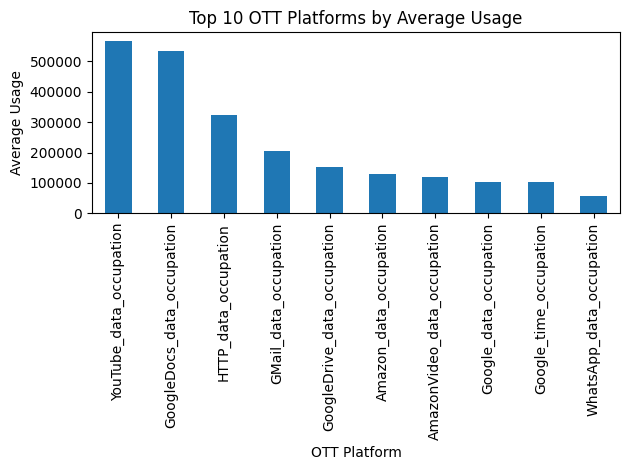

In [24]:
import matplotlib.pyplot as plt

top10.plot(kind="bar")
plt.title("Top 10 OTT Platforms by Average Usage")
plt.xlabel("OTT Platform")
plt.ylabel("Average Usage")
plt.tight_layout()
plt.show()


In [25]:
df_long_cluster = df_clean.melt(
    id_vars=["cluster"],
    value_vars=usage_cols,
    var_name="Platform",
    value_name="Usage"
)


In [26]:
cluster_usage = (
    df_long_cluster
    .groupby("cluster")["Usage"]
    .mean()
)

cluster_usage


,Usage
cluster,
0,22139.474237
1,25997.515162
2,26909.035269
